[논문리뷰] Distributed Representations of Words and Phrases and their Compositionality
1. 도입

단어의 분산 표현은 자연어 처리에서 비슷한 단어들을 묶어 처리하게 함으로서 효율적인 결과를 만들어낸다. 최근에 고안된 Skip-gram model은 비정형 텍스트 데이터에서 많은 양의 단어를 양질의 단어 벡터로 표현하는 좋은 방법이다. 신경망을 활용한 이전의 연구와 달리 skip-gram model은 dense matrix multiplications를 포함하지 않아 효율적이다. 자연어 처리에서 신경망을 활용하는 방법은 언어적 관계와 패턴을 반영하고 연산과 같은 선형 변환으로 활용할 수 있기에 흥미롭다. 

해당 논문에서는 기존의 Skip-gram model을 발전시키는 몇가지 방향을 제안하고자 한다. 학습 과정에서 자주 나오는 단어들을 Subsampling 하는 것이 효율적일 수 있고 또한, 복잡한 hierarchical softmax 대신 Noise Contrastive Estimation(NCE)를 활용하여 더욱 효율적이고 양질의 vector representation을 도출할 수 있다.

또한, 자연어 처리에서 관용어 표현이 어려운데 단어 기반의 Skip-gram이 아닌 구 벡터를 활용하는 방안을 도입했다. 또한, Skip-gram Model을 도입함으로써 단어 벡터 표현에 연산을 가하는 것이 유용할 수 있음을 설명하려 한다.



2. Skip-gram Model

Skip gram 모델의 목표는 타겟단어 벡터를 이용하여 주변의 단어들을 예측하려는 것이다. 이 때, 문맥 단어의 사이즈(개수)에 해당하는 변수 C의 크기를 조정할 수 있는데 이를 늘리면 정확도는 더 높지만 더욱 많은 비용이 투입된다. Skip- Gram은 소프트맥스 활성화 함수를 사용하는데 많은 비용이 투입되기에 실용적이지 못하다.



2. 1.  Hierarchical Softmax : 해석하는데 오래 걸렷음 ㅠ

기존의 Full Softmax의 경우 모든 경우의 지수함수를 더한 후에 해당 결과의 지수함수에 나누는 것으로 확률의 역할을 함. 하지만 One-Hot vector의 차원이 큰 만큼, Full softmax를 이용할 경우 굉장히 많은 연산이 필요하다. 즉, 모든 지수함수를 합쳐야함. 이러한 비효율을 개선하기 위해 도입한 것이 Hierarchical Softmax이다. 



 


출처 : https://velog.io/@xuio/NLP-TIL-Negative-Sampling%EA%B3%BC-Hierarchical-Softmax-Distributed-Representation-%EA%B7%B8%EB%A6%AC%EA%B3%A0-n-gram
Hierarchical Softmax는 위의 그림처럼 이진트리의 형태로 구성된다. 트리의 leaf(맨 끝 노드)는 단어이며, 트리의 root에서부터 각 단어까지 도달하기 위하여 중간 노드는 벡터로 구성되어 있다. 이 벡터들을 거쳐 마지막 단어 노드 까지 도달하는 과정에서 각 단어별로 확률이 부여되는데 이를 최적화하기 위하여 Parameter들을 업데이트 하는 과정이다.




논문에서는 위의 수식으로 설명하는데 이 때, L(w)는 트리의 깊이, n(w,j)는 w라는 단어로 가기 위한 path 상에 놓인 j번째 노드를 일컫는다. ch(x)는 x의 자식노드를 말하며, [[ ]] 기호는 내용이 true이면 1을, False면 -1을 반환한다.  즉, 첫번째 단계부터 트리의 뒤에서 2번째 노드까지 w를 향한 j+1번째 노드가 j번째 노드의 자식 노드일 경우 j번째 노드의 벡터에 1을 곱한 후 input word와 내적을 하게 되며 만약, j+1번째 노드가 j번째 노드의 자식 노드가 아닐경우 j번째 노드의 벡터에 -1을 곱한 후 input word와 내적을 하게 된다. 이러한 결과를 sigmoid함수에 넣어 확률값으로 바꾼 후 각 단계마다 반복하여 확률을 얻게 된다.



이러한 방식은 단어에 대한 학습이 log(V)로 줄어든다는 큰 장점이 있다.

2.2 Negative Sampling



기존에 Hierarchical softmax를 대체하는 기법에는 Noise Contrastive Estimation (NCE)가 있다. NCE는 logistic regression의 방법으로 데이터에서 noise를 제거한다. NCE는 softmax의 log probablity를 최대화해주지만 Skip-gram 모델은 좋은 품질의 vector representation을 학습하는 데에 집중하기에, NCE에서 착안하여 Negative Sampling(NGE)를 모델링하여 이를 새로운 손실함수로 이용한다.


왼쪽은 Positive Sampling과 관련된 수식으로 해당 output의 확률을 최대화하고자 함. 오른쪽은 Negative Sampling에 관한 수식으로 해당 output이 될 확률을 최소화하고자 함.


Negative Samplinig은 Word2Vec의 CBOW와 Skip-Gram 모두 단어 개수가 많아질수록 계산 복잡도가 증가하기에 이러한 문제점을 해결하고자 고안되었다. Word2Vec은 역전파 과정에서 모든 단어의 임베딩 벡터값을 업데이트 한다. 만약, 중심단어가 '한국'이고 주변 단어가 '서울', '대구'와 같은 단어일 때, 별 관계없는 '게임', '변호사'와 같은 수많은 단어의 임베딩 벡터 값을 업데이트 하는 것은 비효율적이다.

Negative Sampling은 이러한 문제점에 착안하여 학습 과정에서 전체 단어가 아니라 일부 단어에 집중하도록 하는 방법이다.

현재 집중하고 있는 주변 단어가 '서울', '대구'일 때, 전체 단어 집합에서 주변 단어가 아닌 단어들 중에서 무작위로 '게임', '컴퓨터', '빵' 이라는 단어를 일부 가져온다. 이들 단어 집합을 이용하여 마지막 단계에서 각 단어가 주변 단어인지, 그렇지 않은지를 분류하는 이진분류 단계를 거친다. 



이를 구현하기 위해 우선 Sample 단어를 선정해야 한다. Sample 단어를 선정하는 기준은 전체 문장에서 자주 사용되는 단어에 높은 가중치를 부여하고 우선적으로 해당 단어를 선별한다. 


여기서 wi는 i번째 단어, f(wi)는 해당 단어의 출현 빈도를 말한다.

기존의 Skip-gram에서 사용되었던 중심단어의 주변 단어들에는 1을 라벨링해준다. 위의 확률을 이용하여 중심단어와 관계없는 단어들을 선택한 후 해당 단어들에는 0을 라벨링해준다. 이후 중심 단어에 대한 임베딩 테이블과 주변단어 혹은 관계없는 단어들의 임베딩 테이블을 만든 후 임베딩 벡터로 변환한다. 두 개의 임베딩 벡터들을 이용하여 중심단어와 다음 단어를 내적한 값을 모델의 예측값으로 이용하고 이를 라벨과의 오차만큼 역전파하여 임베딩 벡터값을 업데이트 하게 된다. 학습이 끝나면 중심단어에 대한 임베딩 테이블을 이용할 수 있다. (아마 주변 단어에 대한 임베딩 테이블은 관계없는 단어가 섞여 있기 때문에 이용하기 힘들기 때문일듯)



위 논문에서는 Sample을 선택하는 기준을 명시하는데, 학습 데이터 수가 적을 경우 Negative Sample의 수를 5~20개로 설정하는 것이 좋지만 큰 데이터에서는 2개에서 5개 사이의 Sample을 선택하는 것이 효율적이라고 한다.



Word2vec에서 성능은 CBOW < Skip-gram < Skip-gram with Neagtive Sampling이라 알려져 있다.



2.3 Subsampling of Frequent words



Corpora에서 가장 많이 등장하는 단어들(in, the, a 등)은 수백만번 등장할 수 있다. 이런 단어들은 덜 등장하는 단어들보다 정보를 반영하지 못한다. 또한, 빈번하게 등장하는 단어들의 벡터는 몇백번의 학습을 거쳐도 크게 변하지 않는다. 이를 활용하여 학습 시 각 단어는 다음과 같은 확률로 제거된다.




t는 threshold, f(wi)는 해당 단어의 빈도를 말한다.
위 식에 따르면 빈도가 높을 수록 제거될 확률이 커지게 된다. 



3 Empirical Results



Hierarchical Softmax, Noise Constrastive Estimation, Negative Sampling, subsampling을 평가한다. 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11280\185820803.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  input_batch = torch.Tensor(input_batch)


Epoch: 1000 cost = 1.930041
Epoch: 2000 cost = 1.884558
Epoch: 3000 cost = 1.308371
Epoch: 4000 cost = 0.857155
Epoch: 5000 cost = 1.235165


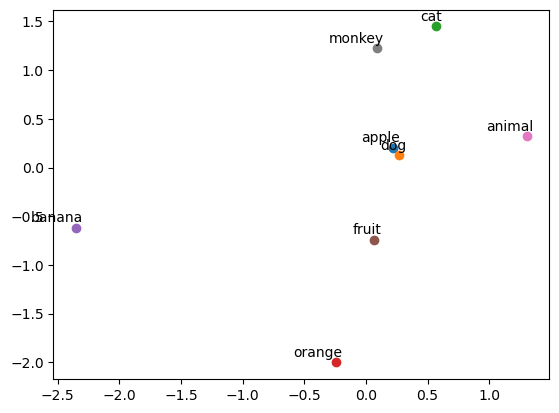

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def random_batch():
    random_inputs=[]
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]]) #중심 단어
        random_labels.append(skip_grams[i][1]) #주변 단어
        
    return random_inputs, random_labels

#모델링
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias = False) #voc_size>embedding_size
        self.WT = nn.Linear(embedding_size, voc_size, bias = False) #embedding_size>voc_size
    
    def forward(self, X):
        #X = [batch_size, voc_size]
        hidden_layer = self.W(X) #[batch_size, embedding_size]
        output_layer = self.WT(hidden_layer) #[batch_size, voc_size]
        return output_layer
    
if __name__ == '__main__':
    batch_size = 2 #mini_batch size
    embedding_size = 2
    sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]
        
    word_sequence = ' '.join(sentences).split()
    word_list = ' '.join(sentences).split()
    word_list = list(set(word_list))
    word_dict = { w: i for i, w in enumerate(word_list)}
    voc_size = len(word_list)
        
    # one size winodow로 skip gram 만들기
    skip_grams=[]
    for i in range(1, len(word_sequence) -1):
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
        for w in context:
            skip_grams.append([target, w])
                
    model = Word2Vec()
        
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
        
    #학습
    for epoch in range(5000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)
            
        optimizer.zero_grad()
        output = model(input_batch)
            
        loss = criterion(output, target_batch)
        if (epoch+1) % 1000 ==0:
            print('Epoch:', '%04d' % (epoch+1), 'cost =','{:.6f}'.format(loss))
                
        loss.backward()
        optimizer.step()
    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()
        plt.scatter(x,y)
        plt.annotate(label, xy = (x,y), xytext=(5,2), textcoords='offset points', ha = 'right', va = 'bottom')
    plt.show()
        